## Features Comparison Notebook

---

### Objective:

- To assess the impact of different features on the performance of the model.
- To determine the optimal features for the model.

### Methodology:

- A model (RF, SVM, LR) is trained with different features (Chroma, MFCC_30, MFCC_120, CQT_30, CQT_70). The features are used 'as extracted' without any additional processing.
- The model is trained with 80% of the data and tested with the remaining 20%.

#### Findings:

-


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tqdm.notebook as tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
import seaborn as sns

sns.set_theme(context="paper", font_scale=1)

In [11]:
# set the paths
BASE_DIR = "../../dataset/"
LABELS = BASE_DIR + "labels.csv"

# features
FEATURES_BASE = "../../features/"
FEATURES = FEATURES_BASE + "raw/"

# Models
MODELS = "../../models/"
MODELS_RESULTS = MODELS + "results/"

# report
PAPER = "../../paper/"
IMAGES_PATH = PAPER + "images/"

# HYERPARAMETERS
SEED = 42
INTERVAL = 1

RESULT_NAME = "results_features_comparison.csv"
COMPLETE_DATASET = "full_data_1s_4000hz_30mfcc_70cqt_12chroma.npy"

In [12]:
# -----------------------------------------Constants-----------------------------------------
SEED = 42
full_data_dict_keys = ["artifacts", "extrahls", "murmurs", "normals", "extrastoles"]
interval = INTERVAL  # You need to define INTERVAL somewhere
sample_rates = ["mix", 4000]
num_feats = [
    "30mfcc",
    "60mfcc",
    "90mfcc",
    "120mfcc",
    "12chroma",
    "20cqt",
    "30cqt",
    "40cqt",
    "60cqt",
    "70cqt",
]
last_features = [
    "RMS",
    "Spectral Centroid",
    "Spectral Bandwidth",
    "Spectral Rolloff",
    "Zero Crossing Rate",
]

# ----------------------------------------- Create DataFrame to store results-----------------------------------------
result_df = pd.DataFrame(
    columns=num_feats + last_features,
    index=["Random Forest", "SVM", "Logistic Regression"],
)

# ----------------------------------------- Loop over each feature-----------------------------------------
for num_feat in num_feats:
    print(f"Processing 4000hz_{num_feat}\n")

    # Load the data
    FEATURES_NAME = f"full_data_{interval}s_4000hz_{num_feat}.npy"
    full_data = np.load(FEATURES + FEATURES_NAME, allow_pickle=True).item()

    # Extract data from the dictionary
    data_list = []
    for key in full_data_dict_keys:
        X = full_data[key]["X"]
        y = full_data[key]["y"]
        data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        data_list.append(data)
    full_data_array = np.concatenate(data_list, axis=0)

    # Split the data into train and test
    X = full_data_array[:, :-1]
    y = full_data_array[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )

    # Train and evaluate models: Random Forest, SVM, Logistic Regression
    for model_name, clf in {
        "Random Forest": RandomForestClassifier(random_state=SEED),
        "SVM": SVC(random_state=SEED),
        "Logistic Regression": LogisticRegression(random_state=SEED, max_iter=1000),
    }.items():
        print(f"Training {model_name}\n")
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        result_df.loc[model_name, num_feat] = score

# ----------------------------------------- Additional processing for last features-----------------------------------------
full_data = np.load(
    FEATURES + COMPLETE_DATASET, allow_pickle=True
).item()
data_list = []
for key in full_data_dict_keys:
    X = full_data[key]["X"]
    y = full_data[key]["y"]
    data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    data_list.append(data)
full_data_array = np.concatenate(data_list, axis=0)

for i,feature_name in enumerate(last_features):
    print(f"Processing 4000hz_{feature_name}\n")
    X = full_data_array[:, 112 + i - 1].reshape(-1, 1)
    y = full_data_array[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED
    )
    for model_name, clf in {
        "Random Forest": RandomForestClassifier(random_state=SEED),
        "SVM": SVC(random_state=SEED),
        "Logistic Regression": LogisticRegression(random_state=SEED, max_iter=300),
    }.items():
        print(f"Training {model_name}\n")
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        result_df.loc[model_name, feature_name] = score

# ----------------------------------------- Save the results-----------------------------------------
result_df.to_csv(MODELS_RESULTS + RESULT_NAME)
result_df

Processing 4000hz_30mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_60mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_90mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_120mfcc

Training Random Forest

Training SVM

Training Logistic Regression



/home/ligari/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Processing 4000hz_12chroma

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_20cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_30cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_40cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_60cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_70cqt

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_RMS

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_Spectral Centroid

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_Spectral Bandwidth

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_Spectral Rolloff

Training Random Forest

Training SVM

Training Logistic Regression

Processing 4000hz_Zero Crossing R

,30mfcc,60mfcc,90mfcc,120mfcc,12chroma,20cqt,30cqt,40cqt,60cqt,70cqt,RMS,Spectral Centroid,Spectral Bandwidth,Spectral Rolloff,Zero Crossing Rate
Random Forest,0.869833,0.846086,0.846966,0.831135,0.692172,0.745822,0.745822,0.7854,0.781882,0.788918,0.366755,0.504837,0.53562,0.486368,0.534741
SVM,0.764292,0.770449,0.772208,0.76781,0.67898,0.729112,0.737027,0.753738,0.759894,0.753738,0.430959,0.58927,0.633245,0.602463,0.611258
Logistic Regression,0.733509,0.755497,0.752858,0.760774,0.596306,0.674582,0.675462,0.683377,0.690413,0.685136,0.386104,0.540018,0.62533,0.602463,0.595427


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0, 0.5, '30mfcc'),
  Text(0, 1.5, '60mfcc'),
  Text(0, 2.5, '90mfcc'),
  Text(0, 3.5, '120mfcc'),
  Text(0, 4.5, '12chroma'),
  Text(0, 5.5, '20cqt'),
  Text(0, 6.5, '30cqt'),
  Text(0, 7.5, '40cqt'),
  Text(0, 8.5, '60cqt'),
  Text(0, 9.5, '70cqt'),
  Text(0, 10.5, 'RMS'),
  Text(0, 11.5, 'Spectral Centroid'),
  Text(0, 12.5, 'Spectral Bandwidth'),
  Text(0, 13.5, 'Spectral Rolloff'),
  Text(0, 14.5, 'Zero Crossing Rate')])

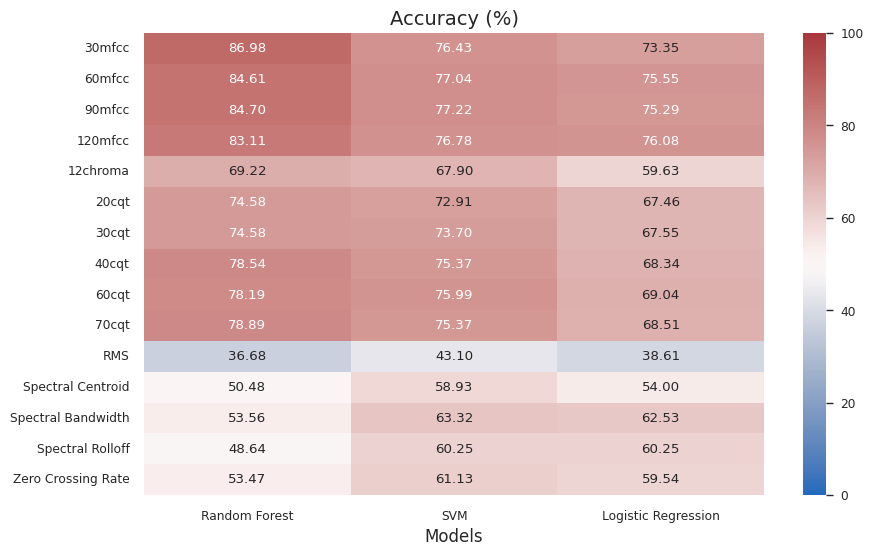

In [13]:
result_df = pd.read_csv(MODELS_RESULTS + RESULT_NAME, index_col=0).transpose()

plt.figure(figsize=(10, 6))
sns.set_theme(context="paper", font_scale=1)

sns.heatmap(result_df.astype(float) * 100, annot=True, cmap="vlag", fmt=".2f",vmax=100,vmin=0)
plt.title("Accuracy (%)", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.yticks(rotation=0)